# Classifying MNIST dataset  
---

## Lab Objective  
To build a neural network model for classifying MNIST digits.  

### Import essential libraries

In [1]:
# Basic Libraries
import torch
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Load the dataset  
The dataset is mnist.csv; we use the read_csv function from Pandas.  
Immediately after importing, take a quick look at the data using the info and head function.

In [3]:
mnist_data = pd.read_csv('mnist.csv')

In [4]:
mnist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the summary of the dataset, we can understand that **label** is a categorical variable denoting the class of the digit (0 - 9), and the remaining 784 variables are grayscale values of each individual pixel (0 - 255) in the 28 x 28 images of the digits. Let us separate Response variable label from the Predictor variables pixel.

In [8]:
label_data = mnist_data[['label']]
pixel_data = mnist_data.drop(columns='label')

In [6]:
label_data.shape

(42000, 1)

In [7]:
pixel_data.shape

(42000, 784)

---

### Basic Exploration  
Check the distribution of classes in the categorical response variable **label_data**.

In [5]:
label_data.value_counts()

NameError: name 'label_data' is not defined

In [6]:
sb.catplot(y = 'label', data = label_data, kind = "count")

NameError: name 'label_data' is not defined

Check the numeric predictor variables X by plotting the 28 x 28 images.

Random Sample : 	 (784,)
Shaped Sample : 	 (28, 28)
Label of Digit: 	 label    1
Name: 31172, dtype: int64


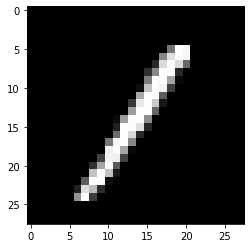

In [9]:
# Take out a random sample from data
from random import randint
idx = randint(0, len(pixel_data.index))
randSample = pixel_data.iloc[idx]
print("Random Sample : \t", randSample.shape)

# Reshape the 784 pixels to 28 x 28
randSample = randSample.values.reshape(28,28)
print("Shaped Sample : \t", randSample.shape)

# Show the image after reshaping
print("Label of Digit: \t", label_data.iloc[idx])
plt.imshow(randSample[:,:], cmap='gray')
plt.show()

---

### Preprocessing for classification  
Normalize the predictors X from 0 - 255 to 0 - 1.

Label of Digit: 	 label    4
Name: 364, dtype: int64


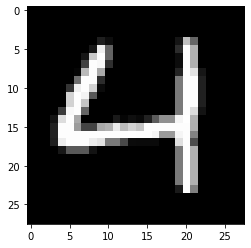

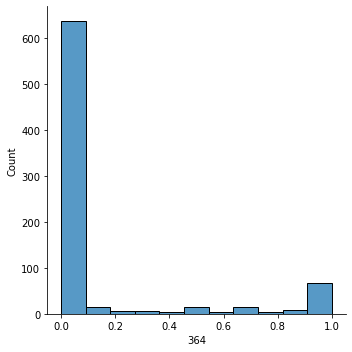

In [10]:
# Scale down the predictors
pixel_data_scaled = pd.DataFrame(pixel_data.values/255)

# Random sample from X_scaled
idx = randint(0, len(pixel_data_scaled.index))
print("Label of Digit: \t", label_data.iloc[idx])
randSample = pixel_data_scaled.iloc[idx]
randSample = randSample.values.reshape(28,28)
plt.imshow(randSample[:,:], cmap='gray')
plt.show()

# Check the distribution of values
sb.displot(pixel_data_scaled.iloc[idx], kde = False)

Create random Train-Test split from the original dataset.

In [11]:
# Split the scaled dataset into Train and Test       
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixel_data_scaled, label_data, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (31500, 784) (31500, 1)
Test Set  : (10500, 784) (10500, 1)


---

### Building your first neural network

Let's build a linear layer for classification.  
The output layer has 10 neurons, with LogSoftmax activation function.

In [12]:
# my_model = ...
my_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=784, out_features= 128),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=128, out_features= 128),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=128, out_features=10),
    torch.nn.LogSoftmax(),
)

In [14]:
conda install -c pytorch torchvision cudatoolkit=10.1 pytorch

^C

Note: you may need to restart the kernel to use updated packages.


Send the model parameters to the GPU.

In [13]:
my_model = my_model.cuda()

AssertionError: Torch not compiled with CUDA enabled

### Creating SGD optimizer

Let us define a gradient descent optimizer to update our parameters iteratively.

In [ ]:
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.01)

### Defining our loss function

In [ ]:
loss_function = torch.nn.NLLLoss()

### Update our model parameters

Iteratively update our model parameters until convergence.

In [ ]:
batch_size = 100
loss_values = []
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.label.to_numpy(), dtype=torch.int64)
for idx in range(100):
    shuffled_indices = torch.randperm(X_train.shape[0])
    
    for idx in range(0, X_train.shape[0], batch_size):
        batch_indices = shuffled_indices[idx : idx + batch_size]
        predictors = X_train[batch_indices].cuda()
        ground_truth = y_train[batch_indices].cuda()
        
        # Fill in the code below to train our model
        # 1) Zero out gradients for all parameters in our model
        optimizer.zero_grad()
        # 2) Predict the classes using our model
        prediction = my_model(predictors)
        # 3) Calculate the losses using loss_function
        loss_value = loss_function(prediction, ground_truth)
        # 4) Calculate the gradients for our model
        loss_value.backward()
        # 5) Update the model parameters
        optimizer.step()
    
    with torch.no_grad():
        updated_loss_value = loss_function(my_model(predictors), ground_truth) # Calculate updated loss value
        loss_values.append(updated_loss_value)
        
plt.plot(np.arange(100), loss_values)

### Check the Accuracy of the Network

While we minimize `loss` to improve accuracy, it is good to check the actual Classification Accuracy on the train and test datasets.

In [ ]:
# Accuracy on Train Set
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32).cuda()
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.int64).cuda()
outputs = my_model(X_test_tensor)

# Find the maximum probability class
_, y_pred_train = torch.max(outputs, 1)

# Check if they match the actual class
correct = (y_pred_train == y_test_tensor.squeeze()).sum().item()
print("Clasification Accuracy : \t", correct / len(y_test_tensor))

**Try it yourself: The code in this notebook only uses a linear layer to classify the MNIST data, try to modify to code to use an artificial neural network model to classify the MNIST data.**